In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from pycaret.regression import *

In [2]:
root = os.path.join('..', 'data', 'upsampled2')
folder = 'mean_upsampled'
df = pd.read_csv(os.path.join(root, f'{folder}_df.csv'))

In [3]:
df['date'] = pd.to_datetime(df['date'])

columns_to_sum = ['zone_a_mwr_patients', 'zone_a__patients', 'zone_b/c_patients']
df.loc[df['total_number_of_patients'] == 0, 'total_number_of_patients'] = df[columns_to_sum].sum(axis=1)

columns_to_sum = ['zone_a_mwr_sets_of_emews', 'zone_a__sets_of_emews', 'zone_b/c_sets_of_emews']
df.loc[df['total_number_of_emews'] == 0, 'total_number_of_emews'] = df[columns_to_sum].sum(axis=1)

In [4]:
# df.drop(columns=['total_number_of_patients', 'total_number_of_emews', 'zone_a_mwr_patients', 'zone_a__patients', 'zone_b/c_patients'], inplace=True)

In [5]:
df.columns

Index(['date', 'zone_a_mwr_patients', 'zone_a_mwr_cat_3', 'zone_a_mwr_cat_4',
       'zone_a_mwr_sets_of_emews', 'zone_a_mwr_deescalations',
       'zone_a_mwr_escalations', 'zone_a__patients', 'zone_a__cat_2',
       'zone_a__cat_3', 'zone_a__sets_of_emews', 'zone_a__deescalations',
       'zone_a__escalations', 'zone_b/c_patients', 'zone_b/c_cat_2',
       'zone_b/c_cat_3', 'zone_b/c_sets_of_emews', 'zone_b/c_deescalations',
       'zone_b/c_escalations', 'total_number_of_patients',
       'total_number_of_emews'],
      dtype='object')

In [6]:
# df['total_cat_2'] = df['zone_a__cat_2'] + df['zone_b/c_cat_2']
# df['total_cat_3'] = df['zone_a_mwr_cat_3'] + df['zone_a__cat_3'] + df['zone_b/c_cat_3']
# df['total_cat_4'] = df['zone_a_mwr_cat_4']

In [7]:
# final_cols = set(df.columns) - set(['zone_a__cat_2', 'zone_b/c_cat_2', 'zone_a_mwr_cat_3', 'zone_a__cat_3', 'zone_b/c_cat_3', 'zone_a_mwr_cat_4'])
# final_df = df[list(final_cols)]

In [8]:
# df['total_cat_2'] = df['zone_a__cat_2'] + df['zone_b/c_cat_2']
# df['total_cat_3'] = df['zone_a_mwr_cat_3'] + df['zone_a__cat_3'] + df['zone_b/c_cat_3']
# df['total_cat_4'] = df['zone_a_mwr_cat_4']

# df['total_sets_of_emews'] = df['zone_a_mwr_sets_of_emews'] + df['zone_a__sets_of_emews'] + df['zone_b/c_sets_of_emews']
# df['total_deescalations'] = df['zone_a_mwr_deescalations'] + df['zone_a__deescalations'] + df['zone_b/c_deescalations']
# df['total_escalations'] = df['zone_a_mwr_escalations'] + df['zone_a__escalations'] + df['zone_b/c_escalations']

# final_df = df[[
#     'date',
#     'total_cat_2',
#     'total_cat_3',
#     'total_cat_4',
#     'total_sets_of_emews',
#     'total_deescalations',
#     'total_escalations'
# ]]

In [9]:
df['total_cat_2'] = df['zone_a__cat_2'] + df['zone_b/c_cat_2']
final_df_cat2 = df.drop(columns=['zone_a__cat_2', 'zone_b/c_cat_2'])

df['total_cat_3'] = df['zone_a_mwr_cat_3'] + df['zone_a__cat_3'] + df['zone_b/c_cat_3']
final_df_cat3 = df.drop(columns=['zone_a_mwr_cat_3', 'zone_a__cat_3', 'zone_b/c_cat_3', 'total_cat_2'])

df['total_cat_4'] = df['zone_a_mwr_cat_4']
final_df_cat4 = df.drop(columns=['zone_a_mwr_cat_4', 'total_cat_2', 'total_cat_3'])


In [10]:
data_dict = {
    'cat2': final_df_cat2,
    'cat3': final_df_cat3,
    'cat4': final_df_cat4
}

In [11]:
train_test_data_dict = {}

for key, data in data_dict.items():
    fh = 60
    split_point = data.shape[0] - fh

    train_test_data_dict[f'{key}_train_data'] = data.iloc[:split_point]
    train_test_data_dict[f'{key}_test_data'] = data.iloc[split_point:]

In [12]:
# new_target_list = ['total_cat_2', 'total_cat_3', 'total_cat_4']

In [13]:
exp_cat2 = RegressionExperiment()

exp_cat2.setup(
    data=train_test_data_dict['cat2_train_data'],
    target='total_cat_2',
    test_data=train_test_data_dict['cat2_test_data'],
    fold_strategy='timeseries',
    data_split_shuffle=False,
    fold_shuffle=False,
    session_id=123,
    verbose=False
)

best_cat2 = exp_cat2.compare_models(exclude=['lightgbm', 'par', 'dummy', 'lar'], errors='raise')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,1.5113,8.2134,2.6008,0.8023,0.0965,0.0595,0.0240
catboost,CatBoost Regressor,1.5250,9.4333,2.7601,0.7863,0.1025,0.0603,0.4230
lr,Linear Regression,0.9792,7.2992,1.9183,0.7803,0.0515,0.0398,0.4760
ridge,Ridge Regression,0.9851,7.3163,1.9226,0.7797,0.0515,0.0398,0.0120
br,Bayesian Ridge,0.9906,7.3957,1.9455,0.7780,0.0520,0.0400,0.0100
et,Extra Trees Regressor,1.4996,9.6863,2.8343,0.7777,0.1021,0.0592,0.0400
en,Elastic Net,1.2144,8.2744,2.3203,0.7652,0.0627,0.0468,0.0130
lasso,Lasso Regression,1.2527,8.7795,2.4154,0.7544,0.0648,0.0474,0.1730
llar,Lasso Least Angle Regression,1.2525,8.7792,2.4152,0.7544,0.0648,0.0474,0.0100
rf,Random Forest Regressor,1.7401,11.4422,3.0426,0.7352,0.1122,0.0687,0.0480


In [14]:
exp_cat2.predict_model(best_cat2, verbose=False)
exp_cat2.pull()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,1.4078,8.0367,2.8349,0.8292,0.1418,0.0717


In [ ]:
exp_cat2.evaluate_model(best_cat2)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [16]:
exp_cat3 = RegressionExperiment()

exp_cat3.setup(
    data=train_test_data_dict['cat3_train_data'],
    target='total_cat_3',
    test_data=train_test_data_dict['cat3_test_data'],
    fold_strategy='timeseries',
    data_split_shuffle=False,
    fold_shuffle=False,
    session_id=123,
    verbose=False
)

best_cat3 = exp_cat3.compare_models(exclude=['lightgbm', 'par', 'dummy', 'lar'], errors='raise')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,1.4307,12.0276,2.7846,0.8781,0.0616,0.0341,0.0090
ridge,Ridge Regression,1.5086,12.5511,2.8648,0.8724,0.0639,0.0358,0.0090
lr,Linear Regression,1.6373,13.6958,2.9848,0.8628,0.0669,0.0386,0.0100
en,Elastic Net,1.4804,12.7796,3.0034,0.8627,0.0714,0.0371,0.0090
llar,Lasso Least Angle Regression,1.5166,13.4246,3.1301,0.8527,0.0760,0.0386,0.0100
lasso,Lasso Regression,1.5170,13.4269,3.1306,0.8526,0.0760,0.0387,0.0100
huber,Huber Regressor,2.3028,22.3714,4.4142,0.7304,0.1084,0.0620,0.0120
et,Extra Trees Regressor,3.2701,33.2973,5.4938,0.6132,0.1324,0.0832,0.0360
rf,Random Forest Regressor,3.5458,35.9340,5.7286,0.5708,0.1399,0.0908,0.0520
gbr,Gradient Boosting Regressor,3.0722,32.3671,5.3566,0.5512,0.1311,0.0795,0.0220


In [17]:
exp_cat3.predict_model(best_cat3, verbose=False)
exp_cat3.pull()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Bayesian Ridge,1.3994,27.1989,5.2153,0.8159,0.0998,0.0399


In [18]:
exp_cat3.evaluate_model(best_cat3)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [19]:
exp_cat4 = RegressionExperiment()

exp_cat4.setup(
    data=train_test_data_dict['cat4_train_data'],
    target='total_cat_4',
    test_data=train_test_data_dict['cat4_test_data'],
    fold_strategy='timeseries',
    data_split_shuffle=False,
    fold_shuffle=False,
    session_id=123,
    verbose=False
)

best_cat4 = exp_cat4.compare_models(exclude=['lightgbm', 'par', 'dummy', 'lar'], errors='raise')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,0.7378,3.2023,1.4951,0.4920,0.3839,0.2707,0.0100
en,Elastic Net,0.7458,3.5663,1.5709,0.4814,0.3959,0.2423,0.0170
llar,Lasso Least Angle Regression,0.7944,4.0753,1.6704,0.4273,0.4245,0.2379,0.0100
lasso,Lasso Regression,0.7945,4.0764,1.6706,0.4272,0.4246,0.2379,0.0170
ridge,Ridge Regression,0.7970,3.2483,1.5248,0.4035,0.3866,0.3471,0.0160
catboost,CatBoost Regressor,0.7947,4.0237,1.7610,0.2052,0.4476,0.2419,0.4150
et,Extra Trees Regressor,0.8232,4.1312,1.7760,0.1965,0.4824,0.2268,0.0380
gbr,Gradient Boosting Regressor,0.7949,3.1820,1.5954,0.1745,0.4548,0.2774,0.0230
huber,Huber Regressor,0.9389,4.7400,1.9140,0.1566,0.4549,0.3712,0.0180
lr,Linear Regression,0.9211,3.9593,1.6508,0.1141,0.4000,0.4183,0.0100


In [20]:
exp_cat4.predict_model(best_cat4, verbose=False)
exp_cat4.pull()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Bayesian Ridge,1.1541,12.9412,3.5974,-1.8739,0.593,0.2648


In [21]:
exp_cat4.evaluate_model(best_cat4)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

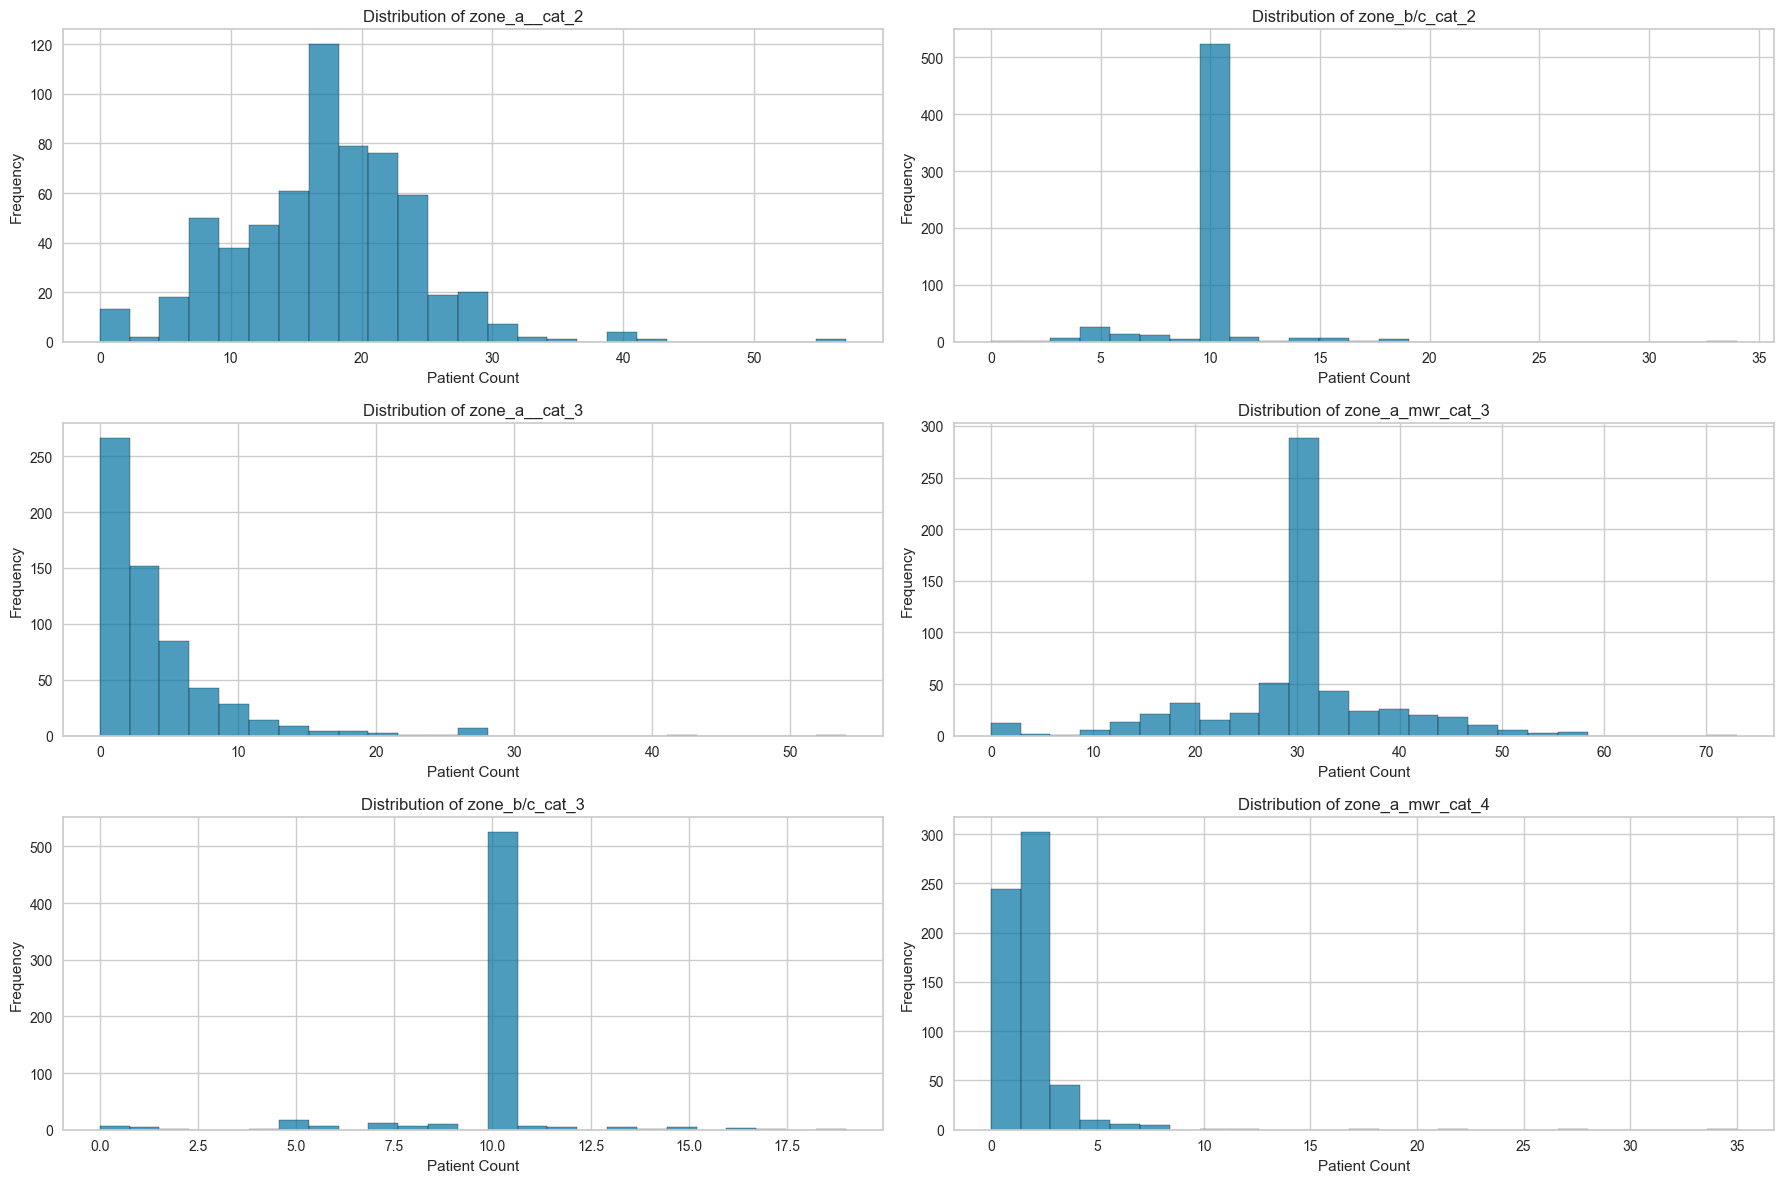

In [22]:
category_columns = [
    'zone_a__cat_2',
    'zone_b/c_cat_2',
    'zone_a__cat_3',
    'zone_a_mwr_cat_3',
    'zone_b/c_cat_3',
    'zone_a_mwr_cat_4',
]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 12))
axes = axes.flatten()

for i, col in enumerate(category_columns):
    ax = axes[i]
    ax.hist(df[col], bins=25, edgecolor='black', alpha=0.7)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel('Patient Count')
    ax.set_ylabel('Frequency')

plt.tight_layout()